# A Predictive Study of Student Dropout Rates
<br>
Class: CSPB 3022 
<br>
Author: Sara Rhoades
<br>
Repository: https://github.com/smrhoades/cu-cspb-3022-summer-2023-project-smrhoades
<br>

**Table of Contents:**
1. [Project Topic](#item-one)
2. [Data Source and Description](#item-two)
3. [Exploratory Data Analysis](#item-three)
3.1. [Data Cleaning](#item-three-a)
3.2. [Data Conversions](#item-three-b)
3.3. [EDA](#item-three-c)
4. [ANOVA](#item-four)
5. [Correlation Matrix](#item-five)
6. [Effect Of Individual Features](#item-six)
7. [Modeling](#item-seven)
7.1. [Model Approach](#item-seven-a)
7.2. [Classification Model](#item-seven-b)
7.3. [Model Accuracy](#item-seven-c)
8. [Conclusions](#item-eight)
9. [References](#item-nine)
10. [Appendix](#item-ten)

<a id="item-one"></a>
## Project Topic

In order to better support struggling students and prevent student dropout, relevant early warning factors are needed to identify students at risk of dropout of college curriculums. These students can then be provided with additional resources to get them back on track towards gradutation. While this support is often avaliable to all students, students at risk may be unaware or hestitant to accept these resources. This leads to additional oversight (and expense) that is not needed for all students equally.

A predictive classification problem with three categories was created for this project with the following goals:
* Accuratly predict if a student is likely to drop out based upon risk factors
* Determine which features are most relevant in determining student dropout
* Establish confidence in prediction of student dropout

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.linear_model as lm
import sklearn.neighbors as knn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

<a id="item-two"></a>
## Data Source and Description

Data was sourced from the UC Irvine Machine Learning Repository [1]. The dataset includes information of 4424 students of 37 features known at the time of student enrollment – academic path, demographics, and social-economic factors. It determined three categories of classification (dropout, enrolled, and graduate) at the end of the semester during which the data was collected.

In [2]:
rawdata = pd.read_csv('data.csv', header=0, delimiter=';')
num_students = rawdata.Target.count()
num_features  = len(rawdata.columns)
print("Number of Students: ",num_students)
print("Number of Features: ", num_features)

Number of Students:  4424
Number of Features:  37


In [3]:
rawdata.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Most of the features of the unprocessed data set are either numberical values or categorical values converted into a categorical number.

In [4]:
rawdata.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

Full descriptions of the features is included as an appendix, with brief descritions here.

* Marital status [Discrete] - Number which indicates marital status

* Application mode [Discrete] - Number which indicates how the student applied for admission

* Application order [Discrete] Application preference order (between 0 - first choice; and 9 last choice)

* Course [Discrete] - Number which indicates the class taken

* Daytime/evening attendance [Discrete] 1 – daytime 0 - evening

* Previous qualification [Discrete] - Number which indicates previous education level

* Previous qualification (grade) [Continuous]  - Grade of previous qualification / education (between 0 and 200)

* Nacionality [Discrete] - Number which indicates nationality

* Mother's qualification [Discrete] - Number which indicates Mother's education level

* Father's qualification [Discrete] - Number which indicates Father's education level

* Mother's occupation [Discrete] - Number which indicates Mother's occupation

* Father's occupation [Discrete] - Number which indicates Father's occupation

* Admission grade [Continuous] Admission grade (between 0 and 200)

* Displaced [Discrete] 1 – yes 0 – no

* Educational special needs [Discrete] 1 – yes 0 – no

* Debtor [Discrete] 1 – yes 0 – no

* Tuition fees up to date [Discrete] 1 – yes 0 – no

* Gender [Discrete] 1 – male 0 – female

* Scholarship holder [Discrete] 1 – yes 0 – no

* Age at enrollment [Discrete] Age of studend at enrollment

* International [Discrete] 1 – yes 0 – no

* Curricular units 1st sem (credited) [Discrete] Number of curricular units credited in the 1st semester

* Curricular units 1st sem (enrolled) [Discrete] Number of curricular units enrolled in the 1st semester

* Curricular units 1st sem (evaluations) [Discrete] Number of evaluations to curricular units in the 1st semester

* Curricular units 1st sem (approved) [Discrete] Number of curricular units approved in the 1st semester

* Curricular units 1st sem (grade) [Discrete] Grade average in the 1st semester (between 0 and 20)

* Curricular units 1st sem (without evaluations) [Discrete] Number of curricular units without evalutions in the 1st semester

* Curricular units 2nd sem (credited) [Discrete] Number of curricular units credited in the 2nd semester

* Curricular units 2nd sem (enrolled) [Discrete] Number of curricular units enrolled in the 2nd semester

* Curricular units 2nd sem (evaluations) [Discrete] Number of evaluations to curricular units in the 2nd semester

* Curricular units 2nd sem (approved) [Discrete] Number of curricular units approved in the 2nd semester

* Curricular units 2nd sem (grade) [Discrete] Grade average in the 2nd semester (between 0 and 20)

* Curricular units 2nd sem (without evaluations) [Discrete] Number of curricular units without evalutions in the 1st semester

* Unemployment rate [Continuous] Unemployment rate (%)

* Inflation rate [Continuous] Inflation rate (%)

* GDP [Continuous] GDP

* Target [Categorical] The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course

At the time of the data collection period, approximately half of the students graduated, a third of the students dropped out, and the rest of the students remained enrolled for additional semesters.

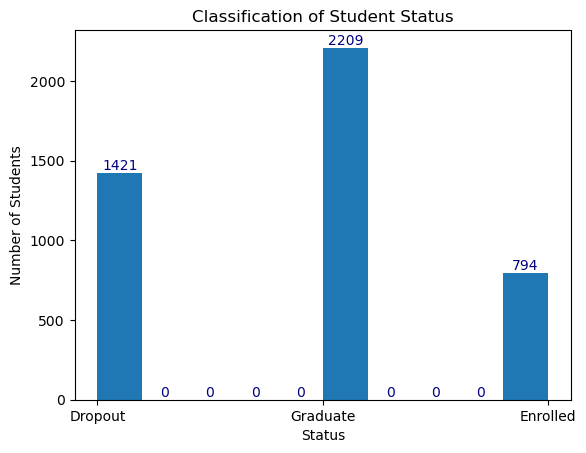

In [5]:
plt.figure()
values, bins, bars = plt.hist(rawdata.Target)
plt.title("Classification of Student Status")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')
plt.show()

<a id="item-three"></a>
## Exploratory Data Analysis

<a id="item-three-a"></a>
### Data Cleaning

This data was preprocessed by the data providers to "to handle data from anomalies, unexplainable outliers, and missing values."[1] From an exploratory look at the data, no missing values are found.

In [6]:
rawdata.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Outliers detection was performed by calculating the z-score of each data point for each predictive feature that is a continous variable. Data points with a z-score of greater than three were considered outliers. This gives the number and index of datapoints more than three standard devations from the mean; these entries were removed leaving 4378 entries. Some of the outliers for different features are the same index, so this is slightly less than the individual number of outliers for each feature.

Feature: Previous qualification (grade)
Number of outliers more than 3 sigma away from mean: 21
Mean: 132.6133137432188 Variance: 173.9320926566865
Feature: Admission grade
Number of outliers more than 3 sigma away from mean: 22
Mean: 126.97811934900544 Variance: 209.72834771715665
Feature: Curricular units 1st sem (grade)
Number of outliers more than 3 sigma away from mean: 0
Mean: 10.640821575154185 Variance: 23.461074945183597
Feature: Curricular units 2nd sem (grade)
Number of outliers more than 3 sigma away from mean: 0
Mean: 10.230205722716985 Variance: 27.15251954018368
Feature: Unemployment rate
Number of outliers more than 3 sigma away from mean: 0
Mean: 11.56613924050633 Variance: 7.096099402719385
Feature: Inflation rate
Number of outliers more than 3 sigma away from mean: 0
Mean: 1.228028933092224 Variance: 1.9118888564993364
Feature: GDP
Number of outliers more than 3 sigma away from mean: 0
Mean: 0.001968806509945778 Variance: 5.152606907459936


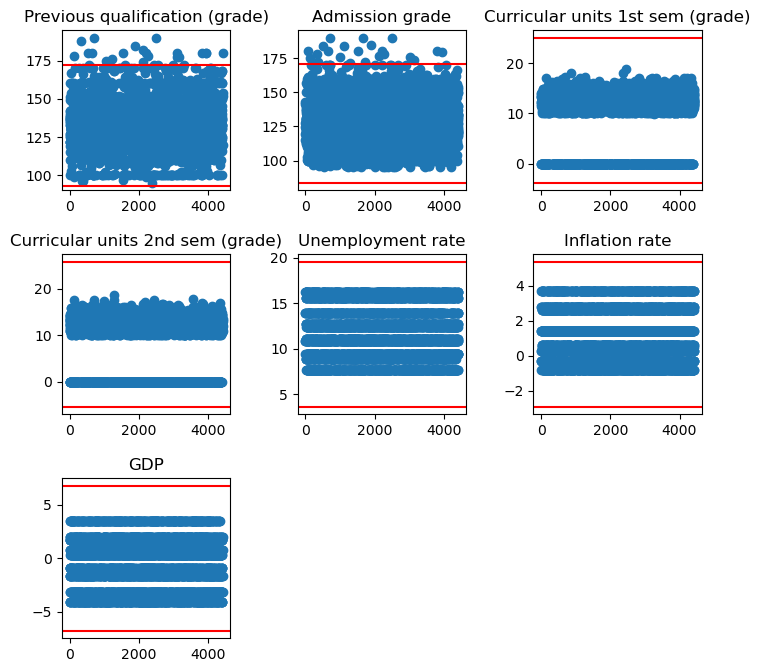

Individual Outliers: 43


In [7]:
float_features = rawdata.columns[rawdata.dtypes == 'float']
outliers = 0
zlimit = 3
plt.figure(figsize=(8,16))
for i, float_feature in enumerate(rawdata[float_features]):
    print("Feature:",float_feature)
    xm = stats.tmean(rawdata[float_feature])
    s = stats.tstd(rawdata[float_feature])
    z = np.abs(stats.zscore(rawdata[float_feature]))
    print("Number of outliers more than",zlimit,"sigma away from mean:",len(np.where(z > zlimit)[0]))
    print("Mean:",xm,"Variance:",s**2)
    #print(stats.describe(rawdata[float_feature]))
    outliers = outliers + len(np.where(z > zlimit)[0])
    ax = plt.subplot(6, 3, i + 1)
    plt.scatter(rawdata.index,rawdata[float_feature])
    plt.axhline(y=xm+zlimit*s, color='r', linestyle='-')
    plt.axhline(y=xm-zlimit*s, color='r', linestyle='-')
    ax.set_title(float_feature, loc='center', wrap=True)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()
print("Individual Outliers:",outliers)

Feature: Previous qualification (grade)
Number of outliers more than 3 sigma away from mean: 21
Mean: 132.6133137432188 Variance: 173.9320926566865
Feature: Admission grade
Number of outliers more than 3 sigma away from mean: 25
Mean: 126.77404042698163 Variance: 201.02258128596185
Feature: Curricular units 1st sem (grade)
Number of outliers more than 3 sigma away from mean: 0
Mean: 10.638400726048618 Variance: 23.378879794176612
Feature: Curricular units 2nd sem (grade)
Number of outliers more than 3 sigma away from mean: 0
Mean: 10.230891108644036 Variance: 27.07003049967152
Feature: Unemployment rate
Number of outliers more than 3 sigma away from mean: 0
Mean: 11.557377798081315 Variance: 7.0940979431395865
Feature: Inflation rate
Number of outliers more than 3 sigma away from mean: 0
Mean: 1.2256281407035174 Variance: 1.9099393471814181
Feature: GDP
Number of outliers more than 3 sigma away from mean: 0
Mean: 0.00798766560073094 Variance: 5.132034674739305


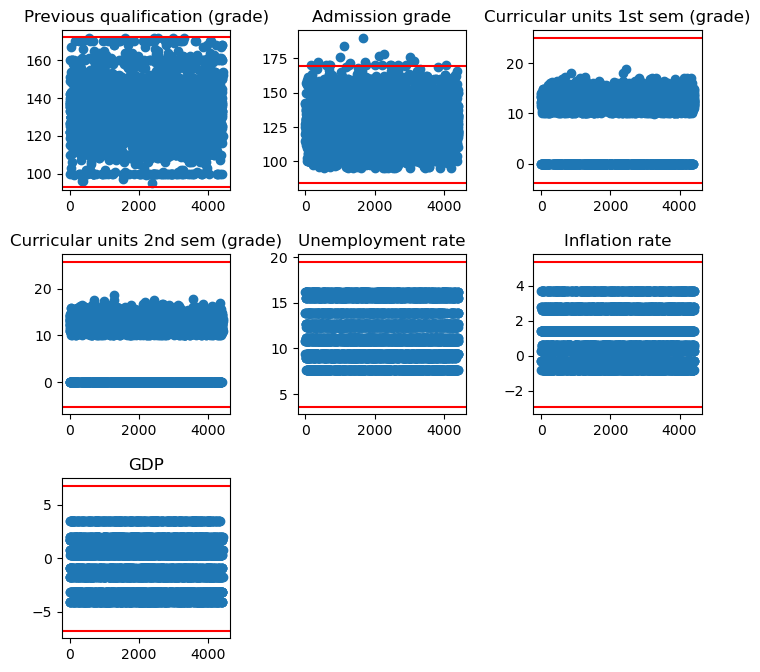

Consecutive Outliers: 46
Number of Students Dropped:  46
Remaining Number of Students:  4378
Percentage of Students Dropped:  1.0397830018083183 %


In [8]:
reduced_data = rawdata.copy()
float_features = reduced_data.columns[reduced_data.dtypes == 'float']
outliers = 0
zlimit = 3
plt.figure(figsize=(8,16))
for i, float_feature in enumerate(reduced_data[float_features]):
    print("Feature:",float_feature)
    xm = stats.tmean(reduced_data[float_feature])
    s = stats.tstd(reduced_data[float_feature])
    z = np.abs(stats.zscore(reduced_data[float_feature]))
    print("Number of outliers more than",zlimit,"sigma away from mean:",len(np.where(z > zlimit)[0]))
    print("Mean:",xm,"Variance:",s**2)
    #print(stats.describe(reduced_data[float_feature]))
    outliers = outliers + len(np.where(z > zlimit)[0])
    reduced_data = reduced_data.drop(np.where(z > zlimit)[0])
    ax = plt.subplot(6, 3, i + 1)
    plt.scatter(reduced_data.index,reduced_data[float_feature])
    plt.axhline(y=xm+zlimit*s, color='r', linestyle='-')
    plt.axhline(y=xm-zlimit*s, color='r', linestyle='-')
    ax.set_title(float_feature, loc='center', wrap=True)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()
print("Consecutive Outliers:",outliers)

rem_num_students = reduced_data.Target.count()
num_dropped = num_students-rem_num_students
print("Number of Students Dropped: ",num_dropped)
print("Remaining Number of Students: ",rem_num_students)
print("Percentage of Students Dropped: ",(num_dropped)/num_students*100, "%")

<a id="item-three-b"></a>
### Data Conversions

While the data has been cleaned, there are still several columns of the data in which the data type would better served as a different type - particularly categorical data which has been converted into integers such as marital status.

In [9]:
reduced_data["Debtor"].describe()

count    4378.000000
mean        0.113065
std         0.316709
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Debtor, dtype: float64

In [10]:
reduced_data["Marital status"].astype('category').describe()

count     4378
unique       6
top          1
freq      3882
Name: Marital status, dtype: int64

The features converted into categoticals are:
* Marital status
* Application mode
* Application order
* Course
* Daytime/evening attendance
* Previous qualification
* Nacionality
* Mother's qualification
* Father's qualification
* Mother's occupation
* Father's occupation
* Displaced
* Educational special needs
* Debtor
* Tuition fees up to date
* Gender
* Scholarship holder
* International

In [11]:
reduced_data["Marital status"] = reduced_data["Marital status"].astype('category')
reduced_data["Application mode"] = reduced_data["Application mode"].astype('category')
reduced_data["Application order"] = reduced_data["Application order"].astype('category')
reduced_data["Course"] = reduced_data["Course"].astype('category')
reduced_data["Daytime/evening attendance\t"] = reduced_data["Daytime/evening attendance\t"].astype('category')
reduced_data["Previous qualification"] = reduced_data["Previous qualification"].astype('category')
reduced_data["Nacionality"] = reduced_data["Nacionality"].astype('category')
reduced_data["Mother's qualification"] = reduced_data["Mother's qualification"].astype('category')
reduced_data["Father's qualification"] = reduced_data["Father's qualification"].astype('category')
reduced_data["Mother's occupation"] = reduced_data["Mother's occupation"].astype('category')
reduced_data["Father's occupation"] = reduced_data["Father's occupation"].astype('category')
reduced_data["Displaced"] = reduced_data["Displaced"].astype('category')
reduced_data["Educational special needs"] = reduced_data["Educational special needs"].astype('category')
reduced_data["Debtor"] = reduced_data["Debtor"].astype('category')
reduced_data["Tuition fees up to date"] = reduced_data["Tuition fees up to date"].astype('category')
reduced_data["Gender"] = reduced_data["Gender"].astype('category')
reduced_data["Scholarship holder"] = reduced_data["Scholarship holder"].astype('category')
reduced_data["International"] = reduced_data["International"].astype('category')

In [12]:
reduced_data.dtypes

Marital status                                    category
Application mode                                  category
Application order                                 category
Course                                            category
Daytime/evening attendance\t                      category
Previous qualification                            category
Previous qualification (grade)                     float64
Nacionality                                       category
Mother's qualification                            category
Father's qualification                            category
Mother's occupation                               category
Father's occupation                               category
Admission grade                                    float64
Displaced                                         category
Educational special needs                         category
Debtor                                            category
Tuition fees up to date                           catego

<a id="item-three-c"></a>
### EDA

Of the 36 predictive features, 18 of them are categorical and 18 are numerical. The categorical_features and the numerical features have been plotted as histograms in separate sets of plots.

In [13]:
categorical_features = reduced_data.columns[reduced_data.dtypes == 'category']
#Minus 1 as 'Target' is also categorical
print("Categorical Features: ",categorical_features[0:len(categorical_features)-1])
print("# Categorical Features: ",len(categorical_features)-1)
numerical_features = reduced_data.columns[reduced_data.dtypes != 'category']
print("Numerical Features:",numerical_features)
print("# Numerical Features:",len(numerical_features))

Categorical Features:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder'],
      dtype='object')
# Categorical Features:  17
Numerical Features: Index(['Previous qualification (grade)', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
    

#### Categorical Features

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


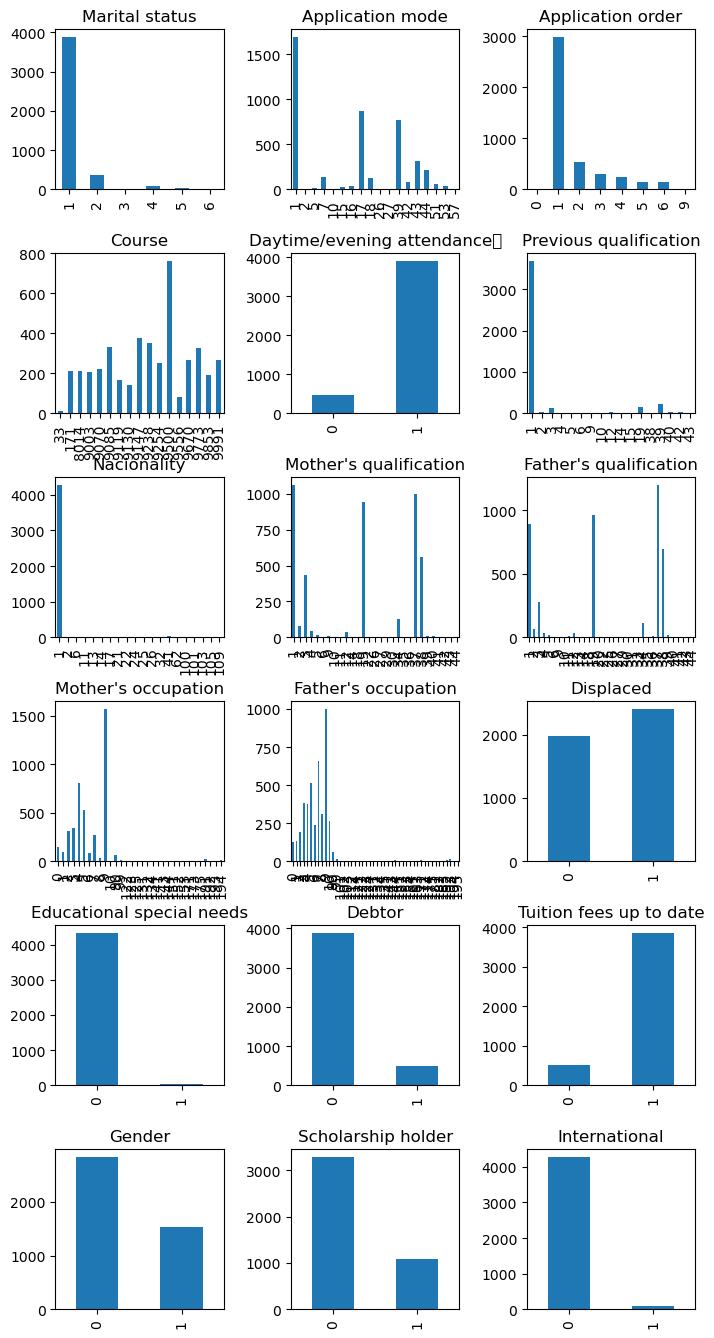

In [14]:
#loop through subplots
plt.figure(figsize=(8,16))
for i, categorical_feature in enumerate(reduced_data[categorical_features]):
    ax = plt.subplot(6, 3, i + 1)
    reduced_data[categorical_feature].value_counts(sort=False).plot(kind="bar", ax=ax)
    ax.set_title(categorical_feature, loc='center', wrap=True)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()

For the categorical data, several factors are 'binary' categories - there are only two options. These categories - Daytime/Evening Attendance, Displaced, Educational Special Needs, Debtor, Tuition Fees up to Date, Gender, Scholarship Holder, and International - often show signifigant bias toward one or the other value. While it is unlikely that a student in the minority category of one predictive factor is also in the minority category of all the other binary categorical factors (e.g. 'Educational Special Needs' students also being 'International' students, etc.), there are two binary categoricals that are correlated. These two are the 'Tuition Fees up to Date' and 'Debtor' factors. There is a heavy bias for the students who are up to date on tuition to not be a debtor.

<Figure size 800x1600 with 0 Axes>

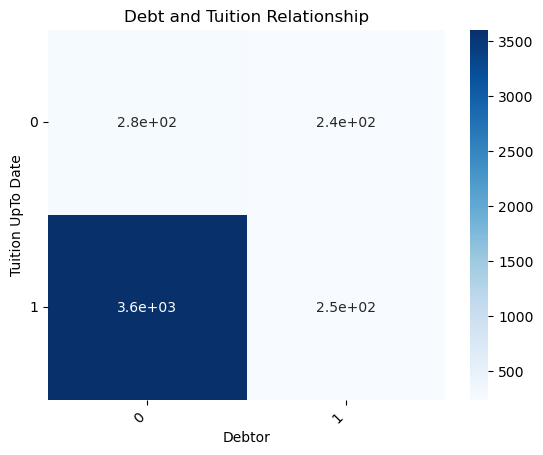

In [15]:
a = reduced_data.groupby(["Tuition fees up to date","Debtor"])["Target"].count()
debt_matrix = [a[0][0],a[0][1]],[a[1][0],a[1][1]]

plt.figure(figsize=(8,16))
plt.figure()
heatmap = sns.heatmap(debt_matrix, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.xlabel('Debtor')
plt.ylabel('Tuition UpTo Date')
plt.title('Debt and Tuition Relationship')
plt.show()  

The other categorical factors - Marital Status, Application Mode, Application Order, Course, Previous Qualification, Nationality, Mother's Qualification, Father's Qualification, Mother's Occupation, and Father's Occuation - all have a multitude of options. Most are unrelated to each other, except for Mother's Qualification and Mother's Occuption, and Father's Qualification and Father's Occupation. For both of those pairs of factors, there are clusters of data points

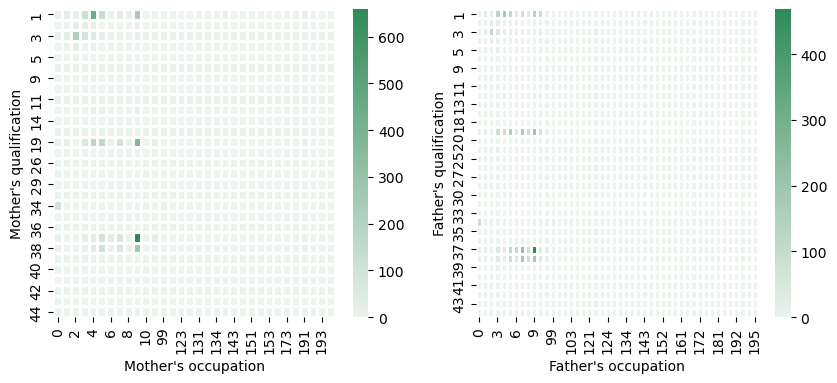

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
a = reduced_data.groupby(["Mother's qualification","Mother's occupation"])["Target"].count().unstack()
sns.heatmap(a, annot=False, ax=axes[0],cmap = sns.light_palette("seagreen", as_cmap=True),linewidths=1)
b = reduced_data.groupby(["Father's qualification","Father's occupation"])["Target"].count().unstack()
sns.heatmap(b, annot=False, ax=axes[1],cmap = sns.light_palette("seagreen", as_cmap=True),linewidths=1)
plt.show()

#### Numerical Features

<Figure size 640x480 with 0 Axes>

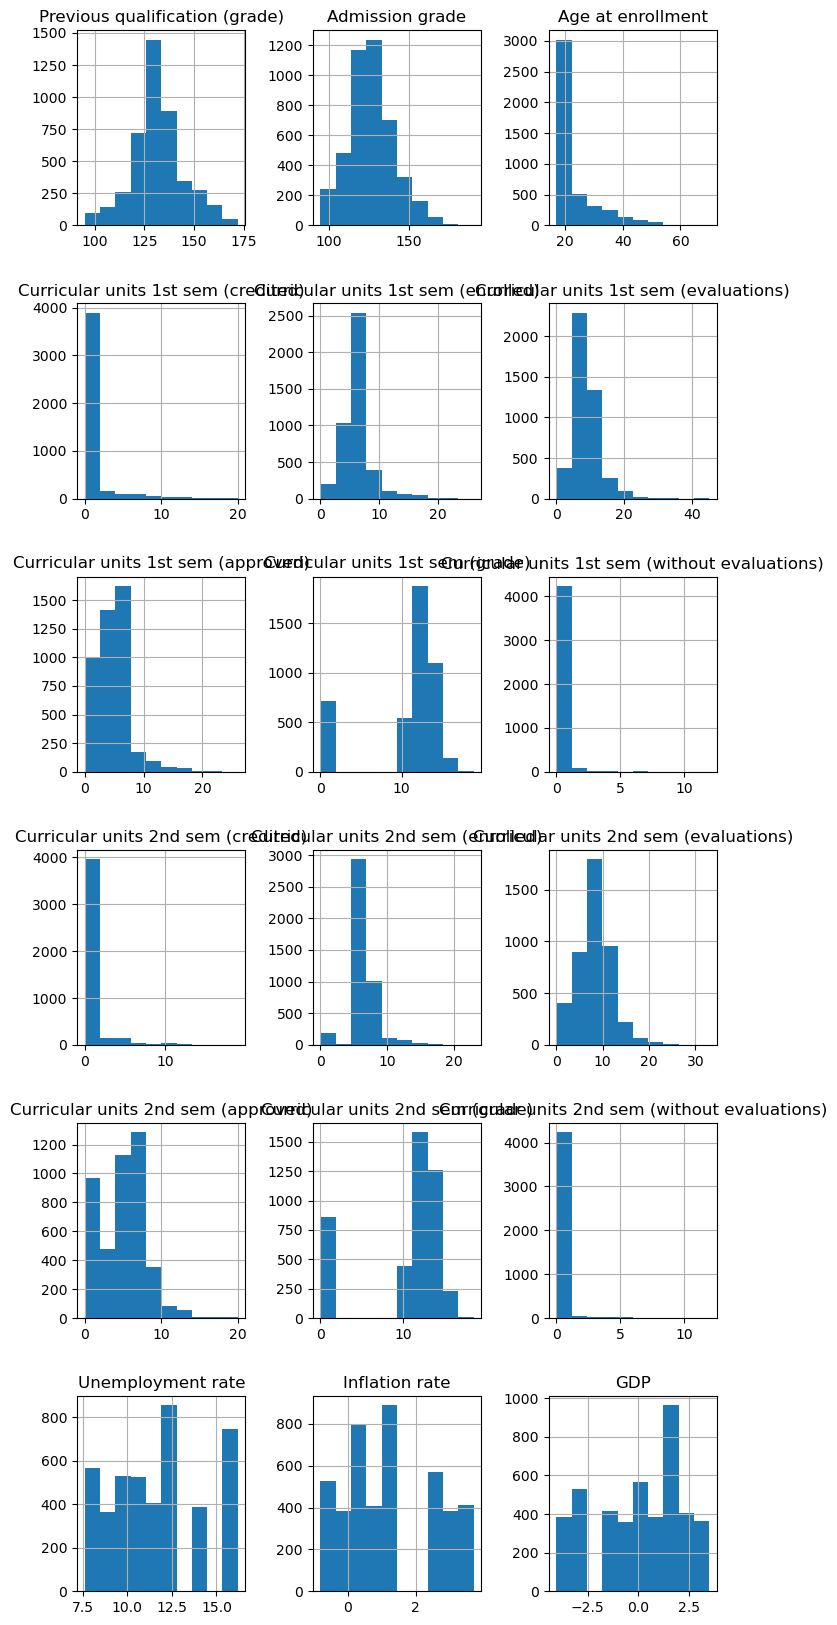

In [17]:
#loop through subplots
plt.figure()
reduced_data.hist(column=numerical_features,figsize=(8,40), layout=(12,3), sharey=False)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()

<a id="item-four"></a>
## ANOVA

#### Categorical Features

In the original set of data, dropout students make up about 1/3 of the total number of students. Any feature in which the percentage of dropout students is signifigantly higher or lower than 33% is a feature which has an influence on whether a student will drop out or stay in school.

Dropout Students are more likely to:
* Be debtors
* Not be up to date on tuition
* Certain application modes
* Certain genders

Students who do not drop out take up a higher percentage of:
* Scholarship students
* Displaced students

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


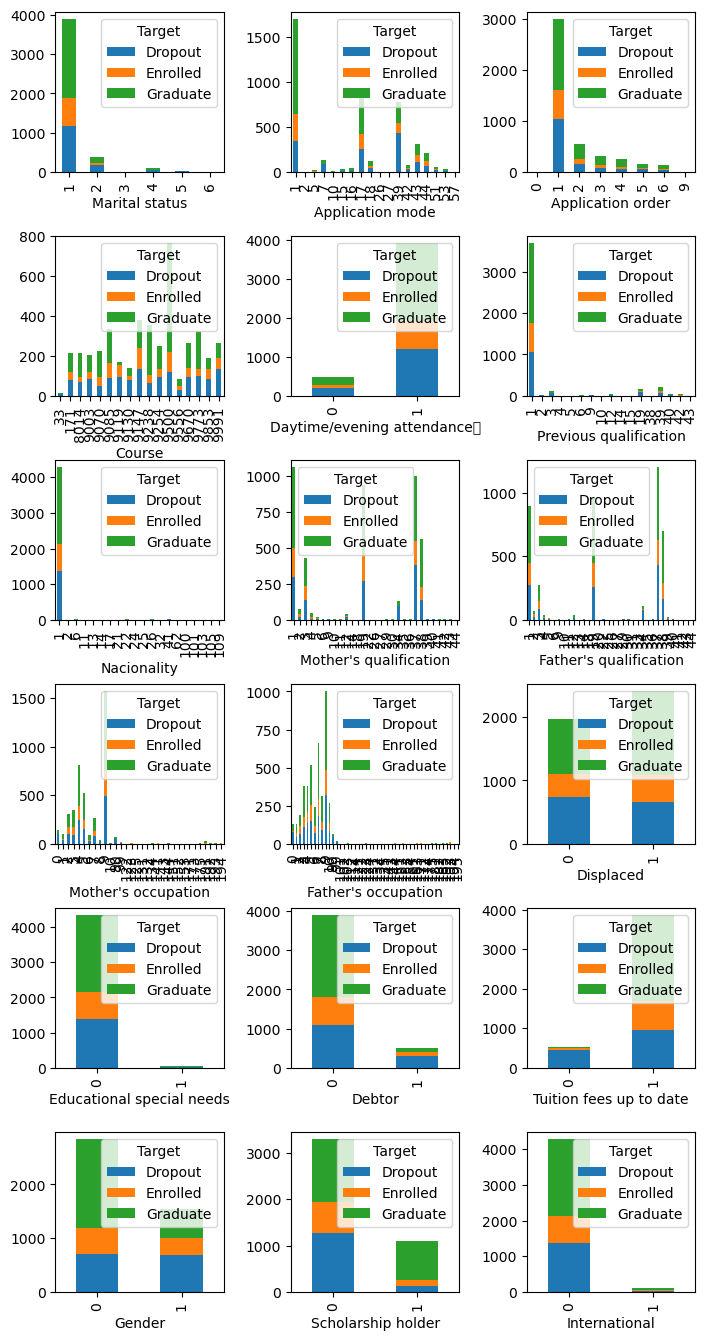

In [18]:
#loop through subplots
fig, axes = plt.subplots(6, 3, figsize=(8,16))
row_n = -1
for i in range (0,18):
    col_n = i % 3
    if col_n == 0:
        row_n = row_n + 1
    subdata = reduced_data.groupby([categorical_features[i],"Target"])["Target"].count().unstack()
    subdata.plot(kind='bar', stacked=True,ax=axes[row_n, col_n])
    ax.set_title(categorical_features[i], loc='center', wrap=True)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()

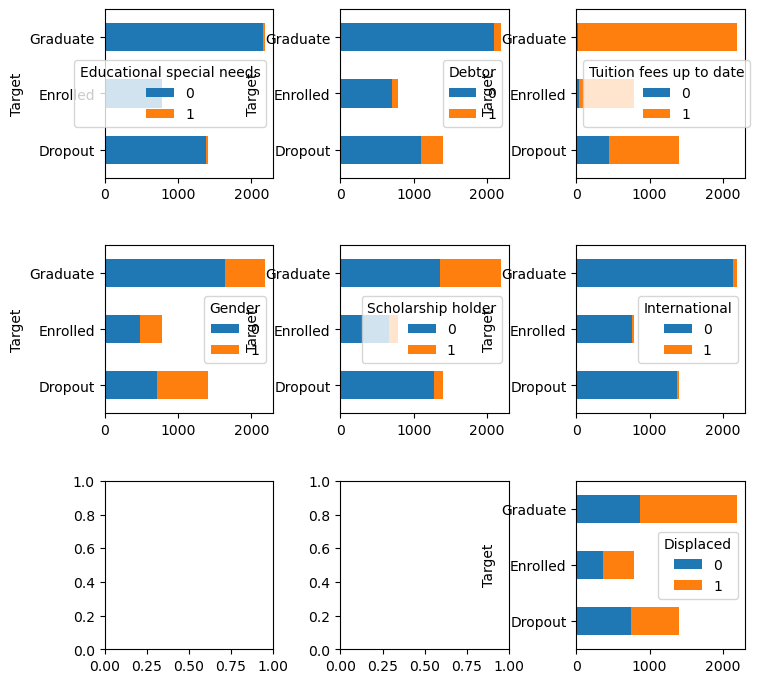

In [19]:
#loop through subplots
fig, axes = plt.subplots(3, 3, figsize=(8,8))
row_n = -1
for i in range (11,18):
    col_n = i % 3
    if col_n == 0:
        row_n = row_n + 1
    subdata = reduced_data.groupby(["Target",categorical_features[i]])["Target"].count().unstack()
    subdata.plot(kind='barh', stacked=True,ax=axes[row_n, col_n])
    ax.set_title(categorical_features[i], loc='center', wrap=True)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()

#### Numerical Features

Like the categorical features, the numerical features can be viewed to determine if they have an influence on the students decision or likihood of dropping out. Unlike the catrgoricals as the featues are continous the determining factor is not the percentage of each category the dropout students take up, but instead the mean and range of the feature when separated into the target categories of enrolled, dropout, and graduate is firewed for each feature.

Dropout Students are more likely to:
* Be older at age of enrollment
* Be taking fewer curriculum units

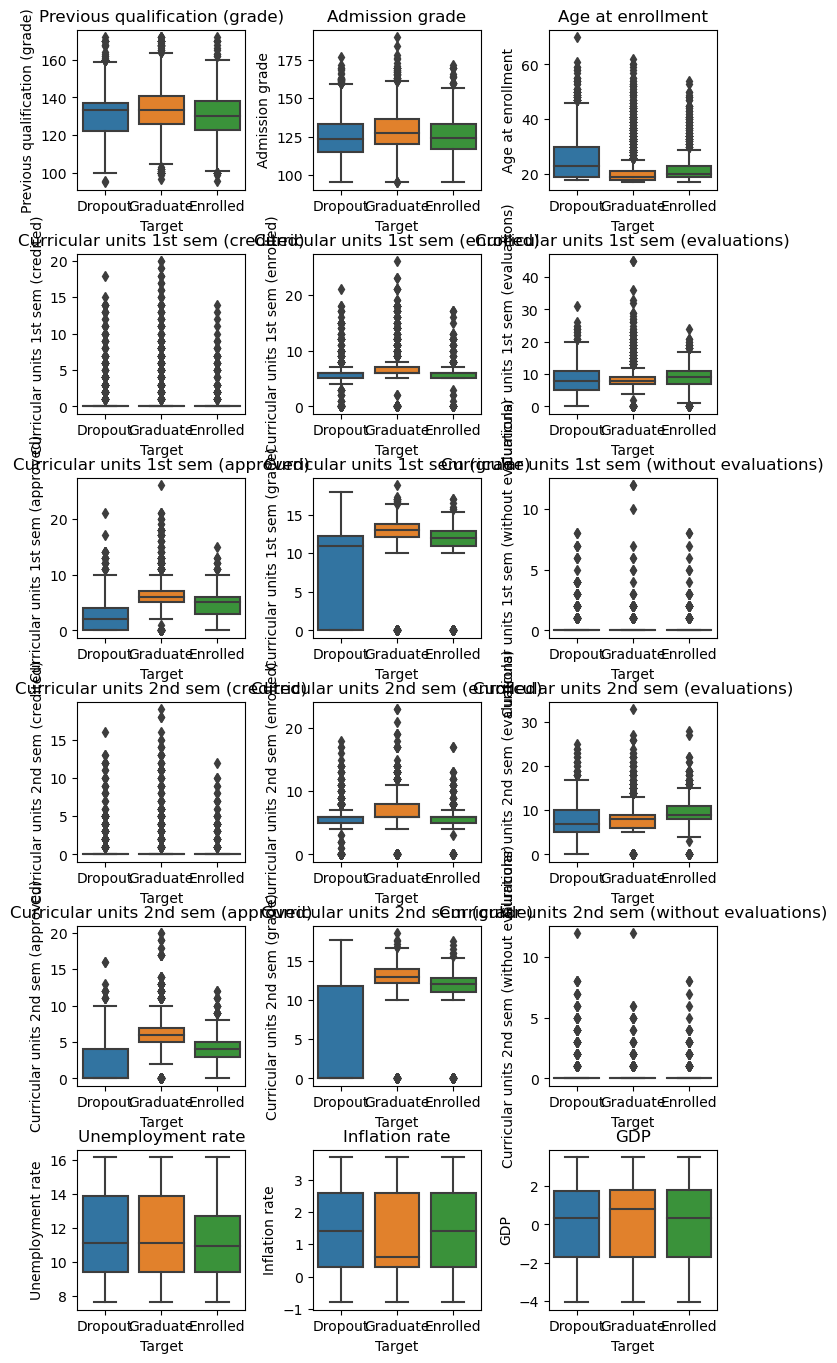

In [20]:
#loop through subplots
plt.figure(figsize=(8,16))
for i in range (0,18):
    numerical_feature = reduced_data[numerical_features[i]]
    ax = plt.subplot(6, 3, i+1)
    sns.boxplot(x='Target',y=numerical_feature,data=reduced_data)
    ax.set_title(numerical_features[i], loc='center', wrap=True)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
#show the plot
plt.show()

<a id="item-five"></a>
## Correlation Matrix

From the correlation matrix, there are a few categories that are clearly related to one another. For example, 'Curricular units 1st sem (credited)' and 'Curricular units 1st sem (enrolled)' are highly correlated (~ +0.7). Meanwhile, 'Curricular units 1st sem (credited)' and 'Previous qualification (grade)' are very un-correlated (~ -0.009).

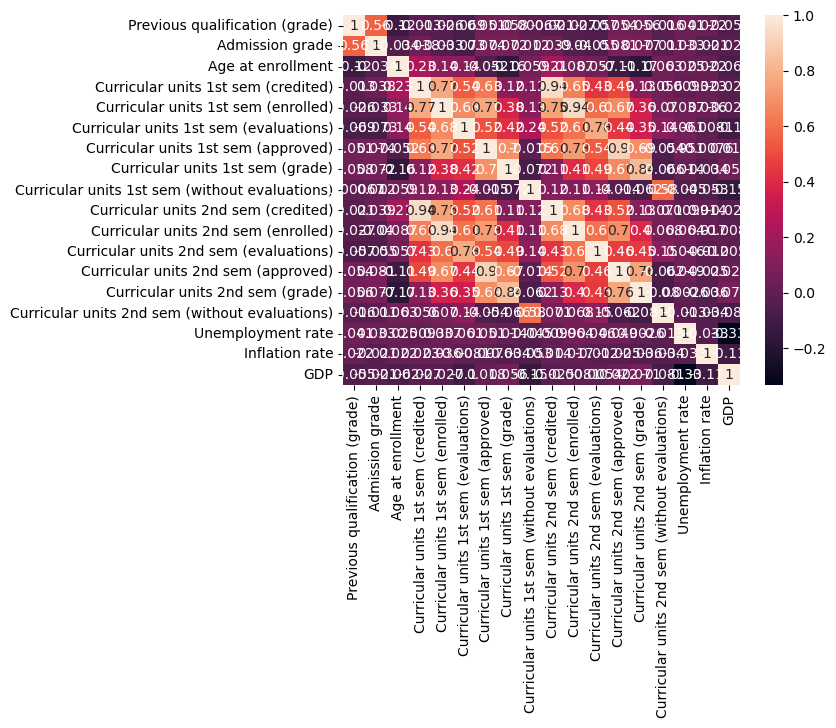

In [21]:
plt.figure()
corr_matrix = reduced_data.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

GDP                                     Unemployment rate                                -0.332103
Curricular units 2nd sem (grade)        Age at enrollment                                -0.172997
Curricular units 1st sem (grade)        Age at enrollment                                -0.158135
GDP                                     Curricular units 1st sem (without evaluations)   -0.145720
Age at enrollment                       Previous qualification (grade)                   -0.115891
                                                                                            ...   
Curricular units 2nd sem (evaluations)  Curricular units 1st sem (evaluations)            0.778732
Curricular units 2nd sem (grade)        Curricular units 1st sem (grade)                  0.837874
Curricular units 2nd sem (approved)     Curricular units 1st sem (approved)               0.904174
Curricular units 2nd sem (enrolled)     Curricular units 1st sem (enrolled)               0.942654
Curricular

Features with high correlation coefficients indicate features in which additional information is not added with the addition of both features into predictions. In effect, these become 'duplicate' features. 

In [23]:
duplicate_features = sorted_mat[sorted_mat > 0.8]
print(duplicate_features)

Curricular units 2nd sem (grade)     Curricular units 1st sem (grade)       0.837874
Curricular units 2nd sem (approved)  Curricular units 1st sem (approved)    0.904174
Curricular units 2nd sem (enrolled)  Curricular units 1st sem (enrolled)    0.942654
Curricular units 2nd sem (credited)  Curricular units 1st sem (credited)    0.944640
dtype: float64


<a id="item-six"></a>
## Effect Of Individual Features

Features that have no effect on the predictions are those for whom there is no signifigant difference in whether a student drops out if they have that quality or not. Similarly, a high effect feature is one in which the student is very likely to drop out (or not drop out) if they have that quality.

To guage the effect of features in this manner, the percentage of students who drop out was calculated from all students with that category of feature. If the percentage was close to 33%, which is the percentage of students who dropped out overall, then it is a low effect feature. If it is far from 33%, it is a high effect feature. This was determined in the following way: if the average (mean) of the dropout percentage of each category in a feature was near 0.33 with a small variance of 0.1 or lower, it was considered a no effect feature. If the dropout percentage of each category in a feature was less than 0.13 or greater than 0.53 with a standard deviation of 0.2 or larger, it was considered a high effect feature. Otherwise it is an average effect feature.

In [24]:
higheffect_features = []
noeffect_features = []

for i in range (0,18):
    subdata = reduced_data.groupby([categorical_features[i],"Target"])["Target"].count().unstack()
    d_per = subdata.Dropout/(subdata.Dropout+subdata.Enrolled+subdata.Graduate)
    #print("Category:",categorical_features[i])
    #print("Dropout Percentage:\n",d_per)
    #print("Dropout Mean:",d_per.mean())
    #print("Dropout Variance:",d_per.std())
    if np.abs((d_per.mean()-0.33)<0.1)&(abs(d_per.std())<0.1):
        noeffect_features.append(categorical_features[i])
    elif np.abs((d_per.mean()-0.33)>0.2)&(abs(d_per.std())>0.2):
        higheffect_features.append(categorical_features[i])

print("High Effect:",higheffect_features)

print("No Effect:",noeffect_features)

High Effect: ['Previous qualification', "Father's qualification", 'Tuition fees up to date']
No Effect: ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'International']


<a id="item-seven"></a>
## Modeling

<a id="item-seven-a"></a>
### Model Approach

#### Reducing the Number of Target Categories

To simplify matters from a multi-classification model to a two-category classfication model, the categories of "Graduate" and "Enrolled" were combined into the single category "InSchool". The "Dropout" classification was unchanged.

In [25]:
# Select Target
multi_target = reduced_data[['Target']].copy()
print(multi_target.groupby('Target').size())

#Convert to two catagories
target_mapping = {"Graduate":"InSchool","Enrolled":"InSchool", "Dropout":"Dropout"}
pd.Series(target_mapping).explode().sort_values()
single_target = reduced_data[['Target']].copy()
single_target['Target'] = multi_target.Target.map(target_mapping).astype('category')
print(single_target.groupby('Target').size())

#Put back into full data frame
targeted_data = reduced_data.copy()
targeted_data["Target"] = single_target["Target"]

Target
Dropout     1404
Enrolled     788
Graduate    2186
dtype: int64
Target
Dropout     1404
InSchool    2974
dtype: int64


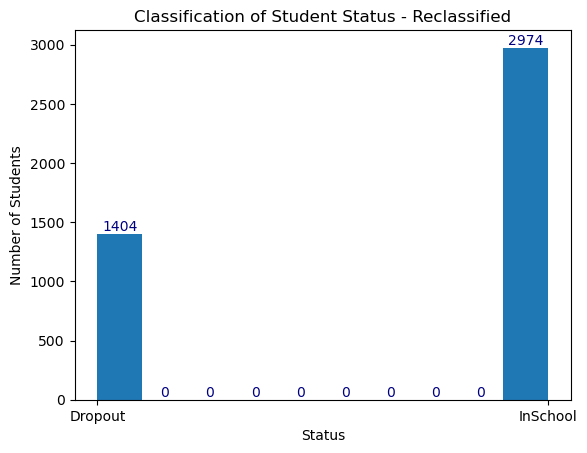

In [26]:
plt.figure()
values, bins, bars = plt.hist(targeted_data["Target"])
plt.title("Classification of Student Status - Reclassified")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')
plt.show()

#### Resampling

As the number of students who graduated or remained in school is approximately double that of the number of students who dropped out, resampling was done in order to create a more even split bewtween each of the categories. The goal is to have a 50-50 split for each of the two categories.

To get this balance, the underrepresented category "Dropout" was resampled with replacement.

In [27]:
#Up-sample the data
targeted_data_dropout = targeted_data[targeted_data.Target == "Dropout"]
targeted_data_inschool = targeted_data[targeted_data.Target == "InSchool"]
resample_droupout = resample(targeted_data_dropout, n_samples=len(targeted_data_inschool), replace=True, random_state=0)

#Put back into full data frame
resample_data = pd.concat([resample_droupout,targeted_data_inschool])

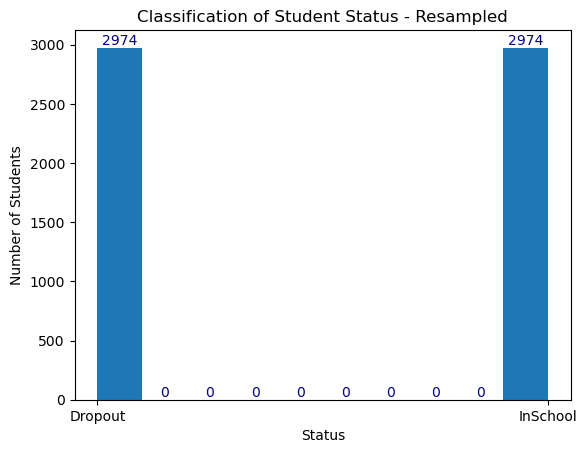

In [28]:
plt.figure()
values, bins, bars = plt.hist(resample_data["Target"])
plt.title("Classification of Student Status - Resampled")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')
plt.show()

#### Reducing the Number of Predictive Features

For the features identified above as having a signifigant effect on the classification of student dropout, we have already indicated that quite a few are redundant data or data with no effect on the target. (E.g. 'Curricular units 1st sem (credited)' and 'Curricular units 1st sem (enrolled)'). The problem with having so many redundant categories is that it reduces the performance and speed of the model.

It also reduces the interpretability of the resulting model. If two related features are 'sharing' the stregth of the coefficient, an important feature can appear less important. Similarly a feature that is caused by another related feature can appear to be more important than its cause. 

To reduce the number of predictive features, both duplicative and no-effect features (as determined above) were removed from the model.

In [29]:
# Select Features
print("Original Number of Features: ", num_features)
target = resample_data["Target"]
all_features = resample_data.drop('Target', axis=1)
features = all_features.copy()
print("Duplicates:")
for i in range(0,len(duplicate_features)):
    print(duplicate_features.index[i][0])
    features = features.drop([duplicate_features.index[i][0]], axis=1)
print("No Effect:")
for i in range(0,len(noeffect_features)):
    print(noeffect_features[i])
    features = features.drop([noeffect_features[i]], axis=1)
num_reduced_features = len(features.columns)
print("Remaining Number of Features: ", num_reduced_features)

Original Number of Features:  37
Duplicates:
Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (credited)
No Effect:
Daytime/evening attendance	
Displaced
Educational special needs
International
Remaining Number of Features:  28


#### Splitting into Training and Test Data

Data is split into training data and test data with a 80-20 ratio. This deparation of training and test data prevents the model from over fitting to the provided data and allows for a more unbiased estimation of model accuracy.

In [30]:
# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (4758, 28)
Shape of testing feature: (1190, 28)
Shape of training label: (4758,)
Shape of training label: (1190,)


<a id="item-seven-b"></a>
### Classification Model

Several model types were attempted in order to classify the data into two classes, including support vector classification, logistic regression, and k-nearest neighbors. Each of the types were evaluated and the best-performing type was selected as the final model.

#### Two-Category Classification Model (SVC)

Training the model is done suing the $fit$ function of the model included in sklearn. The kernel was selected as 'linear' with a default regularization parameter of 1.0.

In [31]:
model_SVC = SVC(kernel='linear', C = 1.0).fit(X_train, y_train)

Testing the model is done using the $predict$ function of the model.

In [32]:
y_pred_SVC = model_SVC.predict(X_test)

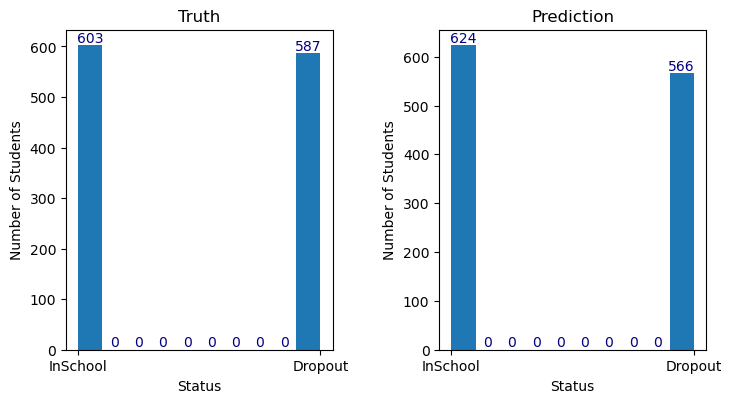

In [33]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
values, bins, bars = plt.hist(y_test)
ax.set_title("Truth", loc='center', wrap=True)
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')

ax = plt.subplot(1, 2, 2)
values, bins, bars = plt.hist(y_pred_SVC)
ax.set_title("Prediction", loc='center', wrap=True)
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

#show the plot
plt.show()

The SVC model tends to slight underpredict the number of dropout students. This model has a higher false positive (in-school) prediction and a lower false negative (dropout) prediction.

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print("TN:",conf_matrix[0][0],"TP:",conf_matrix[1][1],"FN:",conf_matrix[1][0],"FP:",conf_matrix[0][1])
print("Total Correct:",conf_matrix[0][0]+conf_matrix[1][1])
print("Total Incorrect:",conf_matrix[1][0]+conf_matrix[0][1])

TN: 470 TP: 507 FN: 96 FP: 117
Total Correct: 977
Total Incorrect: 213


#### Two-Category Classification Model (LR)

Training the model is done suing the $fit$ function of the model included in sklearn.

In [35]:
model_LR = lm.LogisticRegression().fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing the model is done using the $predict$ function of the model.

In [36]:
y_pred_LR = model_LR.predict(X_test)

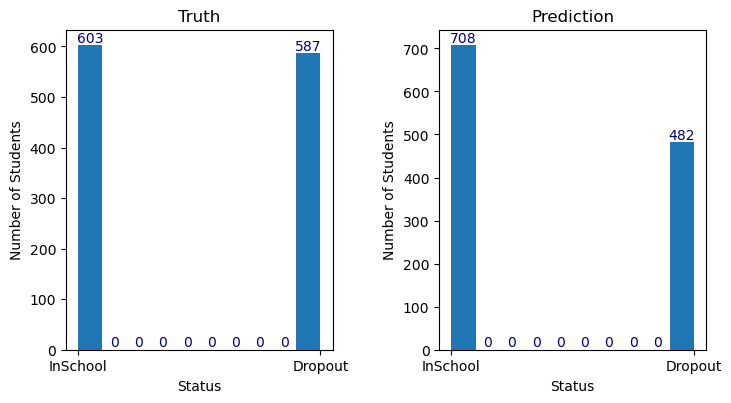

In [37]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
values, bins, bars = plt.hist(y_test)
ax.set_title("Truth", loc='center', wrap=True)
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')

ax = plt.subplot(1, 2, 2)
values, bins, bars = plt.hist(y_pred_LR)
ax.set_title("Prediction", loc='center', wrap=True)
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

#show the plot
plt.show()

The linear regression model tends to signifigantly under predict the number of students who will drop out. It also has the lowest correct prediction rate of the three models tested.

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_LR)
print("TN:",conf_matrix[0][0],"TP:",conf_matrix[1][1],"FN:",conf_matrix[1][0],"FP:",conf_matrix[0][1])
print("Total Correct:",conf_matrix[0][0]+conf_matrix[1][1])
print("Total Incorrect:",conf_matrix[1][0]+conf_matrix[0][1])

TN: 379 TP: 500 FN: 103 FP: 208
Total Correct: 879
Total Incorrect: 311


#### Two-Category Classification Model (KNN)

Training the model is done suing the $fit$ function of the model included in sklearn. The number of neighbors was varied in odd numbers from 1 to 9.

In [39]:
model_KNN = knn.KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

Testing the model is done using the $predict$ function of the model.

In [40]:
y_pred_KNN = model_KNN.predict(X_test)

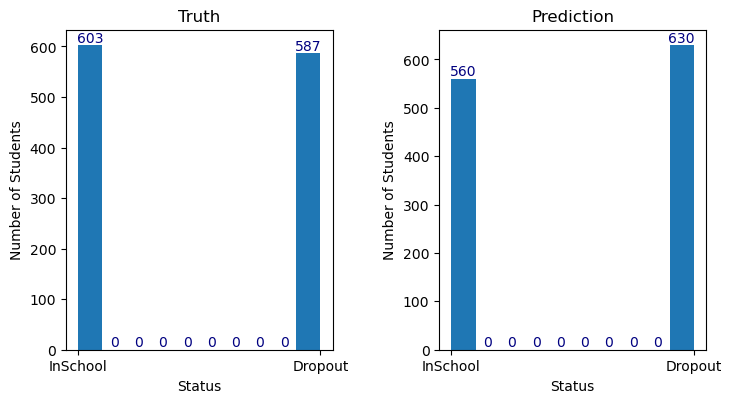

In [41]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
values, bins, bars = plt.hist(y_test)
ax.set_title("Truth", loc='center', wrap=True)
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')

ax = plt.subplot(1, 2, 2)
values, bins, bars = plt.hist(y_pred_KNN)
ax.set_title("Prediction", loc='center', wrap=True)
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.bar_label(bars, fontsize=10, color='navy')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

#show the plot
plt.show()

Depending on the k-number, the KNN model tends to overpredict the number of students who will drop out by varying amounts. This model has a higher false negative (dropout) prediction and a lower false positive (in-school) prediction. Of the three models, it has the highest correct prediction rate.

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print("TN:",conf_matrix[0][0],"TP:",conf_matrix[1][1],"FN:",conf_matrix[1][0],"FP:",conf_matrix[0][1])
print("Total Correct:",conf_matrix[0][0]+conf_matrix[1][1])
print("Total Incorrect:",conf_matrix[1][0]+conf_matrix[0][1])

TN: 521 TP: 494 FN: 109 FP: 66
Total Correct: 1015
Total Incorrect: 175


#### Final Model Selection

Final model selection is based the model's predictive ability - as measured by correct predictions of student dropout. Getting not only the correct number of dropout predictions but also for the correct students is important for the model. 

If two models are then close but imperfect in their ability to predict if a student will drop out, the one that slightly overpredicts the number of students who drop out is prefered over the one that slightly underpredicts the student dropout rate. While this does increase costs level of oversight for these students, this has better long term rewards for the students, and the cost to the college is recuperated when the student re-enrolls for future semesters, as well as in college rankings as they develop a lower dropout rate.

The model with the best overall performance is that of the k-nearest neightbor model with k equal to one. Performance of this model is sumarized in the next section.

In [43]:
model = model_KNN
y_pred = model.predict(X_test)

<a id="item-seven-c"></a>
### Model Accuracy

#### Confusion Matrix

While the model predicts about a 50-50 split in students who drop out versus those who stay in school, there is a signifigant amount of misprediction in the model. This can most clearly be seen in the confusion matrix.

[[521  66]
 [109 494]]
TN: 521 TP: 494 FN: 109 FP: 66


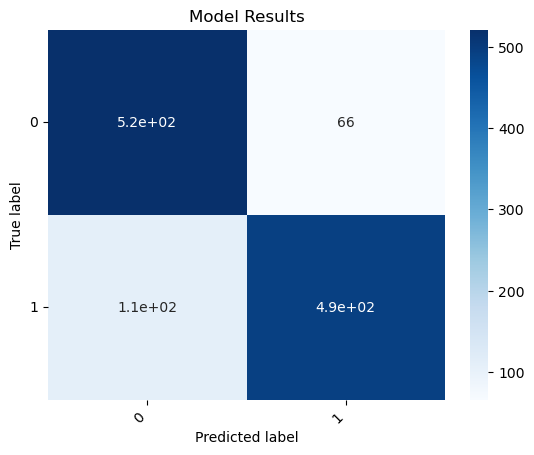

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
TN = conf_matrix[0][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
print("TN:",TN,"TP:",TP,"FN:",FN,"FP:",FP)

plt.figure()
heatmap = sns.heatmap(conf_matrix, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Results')
plt.show()  

#### Performance Metrics: Accuracy, Specificity, Fallout

Three measures were used to determine the correctness of the model. These are accuracy, specificity, and fall-out. As the 'dropout' is the negative category and the one we are most interested in, metrics that deal with classification or misclassification of this type are the more important. It is desired to have a large accuracy, large specificity, and small fall out.

Accuracy: the proportion of true results among the total number of cases examined. $(TP+TN)/(TP+FP+TN+FN)$

Precision: used to calculate how much proportion of all data that was predicted positive was true positive. $TP/(TP+FP)$

Recall: used to calculate how much proportion of true positives is correctly classified as positive. $TP/(TP+FN)$

Specificity: used to calculate how much proportion of true negatives is correctly classified as negative. $TN/(TN+FP)$

Fall-out: used to calculate how much proportion of true negatives is incorrectly classified as positive. $FP/(FP+TN)$

In [45]:
Acc = round((TP+TN)/(TP+FP+TN+FN),3)
Prec =  round(TP/(TP+FP),3)
Recall =  round(TP/(TP+FN),3)
Specif = round(TN/(TN+FP),3)
Fallout = round(FP/(FP+TN),3)
#print("Accuracy:",Acc,"Precision:",Prec,"Recall:",Recall,"Specificity",Specif,"Fallout:",Fallout)
print("Accuracy:",Acc,"Specificity",Specif,"Fallout:",Fallout)

Accuracy: 0.853 Specificity 0.888 Fallout: 0.112


<a id="item-eight"></a>
## Conclusions

The k-nearest neighbors model was able to correctly identify 85% of students as likely (or not) to dropout of college. With high specificity (0.88) and low fallout (0.11), students at risk of dropping out can be identified and provided with additional resources to get back on track and remain in college until graduation.

<a id="item-nine"></a>
## References

[1] Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89

[2] M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

[3] Realinho, V.; Machado, J.; Baptista, L.; Martins, M.V. Predicting Student Dropout and Academic Success. Data 2022, 7, 146. https://doi.org/10.3390/data7110146

[4] GeeksForGeeks. (Dec 26, 2020). "Sort Correlation Matrix in Python". https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

[5] QuantInsti. (May 16, 2022). "Machine Learning Classification Strategy In Python". https://blog.quantinsti.com/machine-learning-classification-strategy-python/

[6] DataPlotPlus. (Sept 28, 2022). "How to Plot Multiple Bar Plots in Pandas and Matplotlib". https://dataplotplus.com/plot-multiple-bar-line-plots-pandas-and-matplotlib/#google_vignette

<a id="item-ten"></a>
## Appendix

### Feature Descriptions [1]

* Marital status	[Discrete]	1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

* Application mode	[Discrete]	1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)

* Application order	[Discrete]	Application order (between 0 - first choice; and 9 last choice)

* Course	[Discrete]	33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)

* Daytime/evening attendance	[Discrete]	1 – daytime 0 - evening

* Previous qualification	[Discrete]	1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)

* Previous qualification (grade)	[Continuous]	Grade of previous qualification (between 0 and 200)

* Nacionality	[Discrete]	1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

* Mother's qualification	[Discrete]	1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

* Father's qualification	[Discrete]	1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

* Mother's occupation	[Discrete]	0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants

* Father's occupation	[Discrete]	0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers

* Admission grade	[Continuous]	Admission grade (between 0 and 200)

* Displaced	[Discrete]	1 – yes 0 – no

* Educational special needs	[Discrete]	1 – yes 0 – no

* Debtor	[Discrete]	1 – yes 0 – no

* Tuition fees up to date	[Discrete]	1 – yes 0 – no

* Gender	[Discrete]	1 – male 0 – female

* Scholarship holder	[Discrete]	1 – yes 0 – no

* Age at enrollment	[Discrete]	Age of studend at enrollment

* International	[Discrete]	1 – yes 0 – no

* Curricular units 1st sem (credited)	[Discrete]	Number of curricular units credited in the 1st semester

* Curricular units 1st sem (enrolled)	[Discrete]	Number of curricular units enrolled in the 1st semester

* Curricular units 1st sem (evaluations)	[Discrete]	Number of evaluations to curricular units in the 1st semester

* Curricular units 1st sem (approved)	[Discrete]	Number of curricular units approved in the 1st semester

* Curricular units 1st sem (grade)	[Discrete]	Grade average in the 1st semester (between 0 and 20)

* Curricular units 1st sem (without evaluations)	[Discrete]	Number of curricular units without evalutions in the 1st semester

* Curricular units 2nd sem (credited)	[Discrete]	Number of curricular units credited in the 2nd semester

* Curricular units 2nd sem (enrolled)	[Discrete]	Number of curricular units enrolled in the 2nd semester

* Curricular units 2nd sem (evaluations)	[Discrete]	Number of evaluations to curricular units in the 2nd semester

* Curricular units 2nd sem (approved)	[Discrete]	Number of curricular units approved in the 2nd semester

* Curricular units 2nd sem (grade)	[Discrete]	Grade average in the 2nd semester (between 0 and 20)

* Curricular units 2nd sem (without evaluations)	[Discrete]	Number of curricular units without evalutions in the 1st semester

* Unemployment rate	[Continuous]	Unemployment rate (%)

* Inflation rate	[Continuous]	Inflation rate (%)

* GDP	[Continuous]	GDP

* Target	[Categorical]	The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course